In [ ]:
#Installation of required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_dir= '/content/gdrive/MyDrive/ergasia ml/ml data/diabetes.csv'

In [ ]:
df = pd.read_csv(data_dir)

In [ ]:
#BASIC EXPLORATORY DATA ANALYSIS (VISUALIZATIONS)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

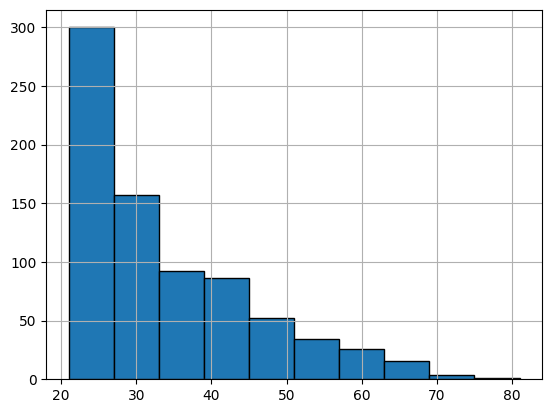

In [ ]:
df["Age"].hist(edgecolor = "black");

In [ ]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

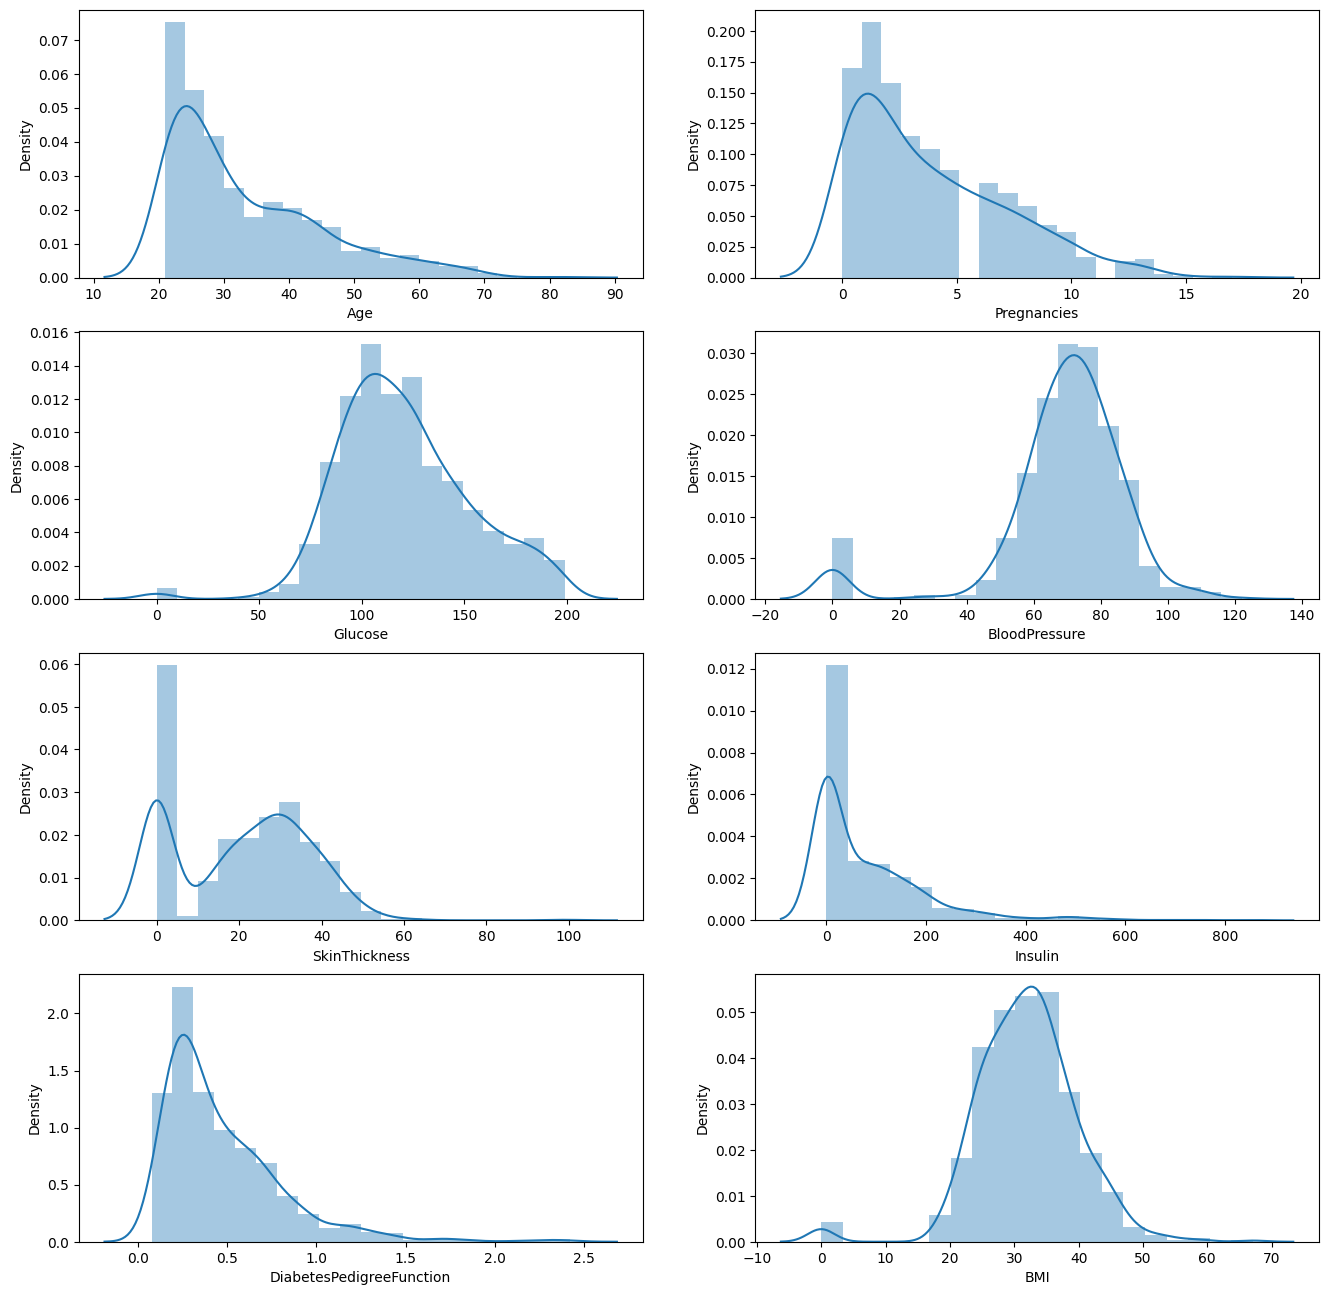

In [ ]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0])
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

In [ ]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [ ]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [ ]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [ ]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [ ]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [ ]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [ ]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [ ]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


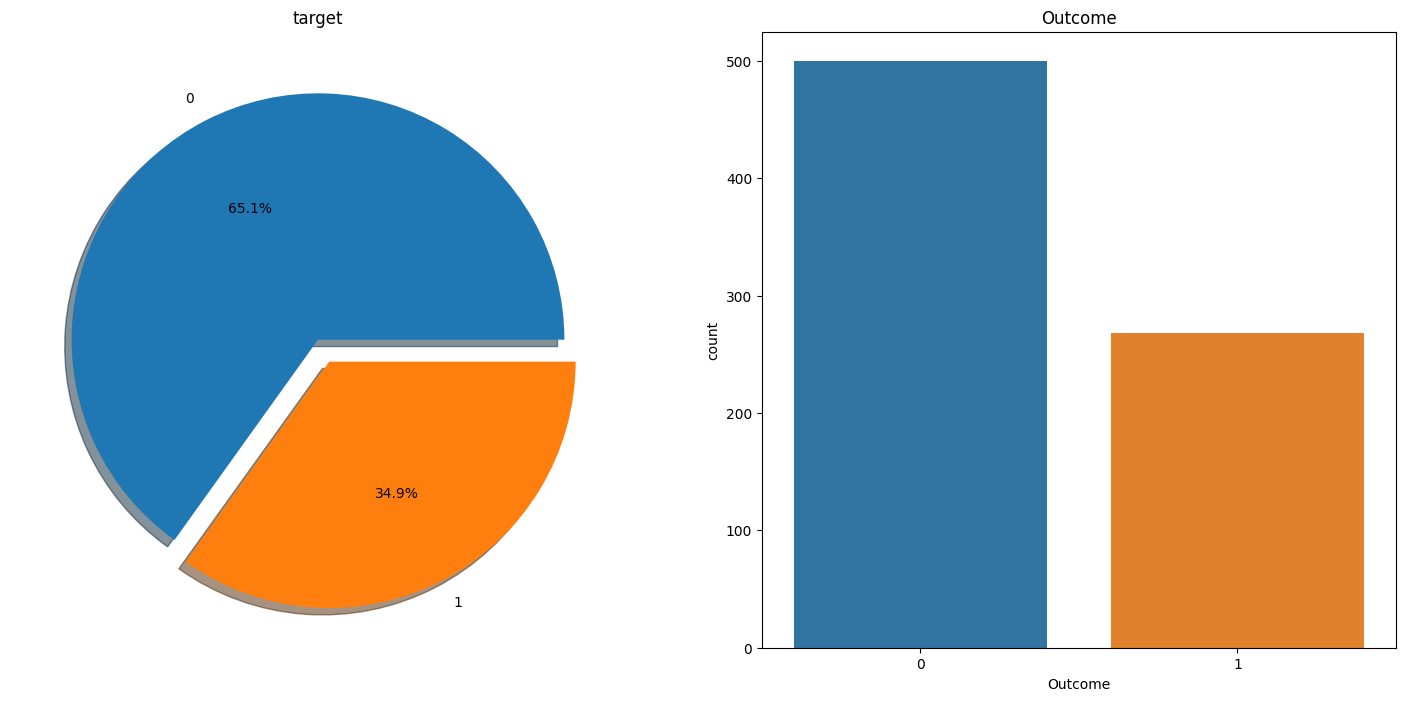

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')

# Countplot
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')

plt.show()


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


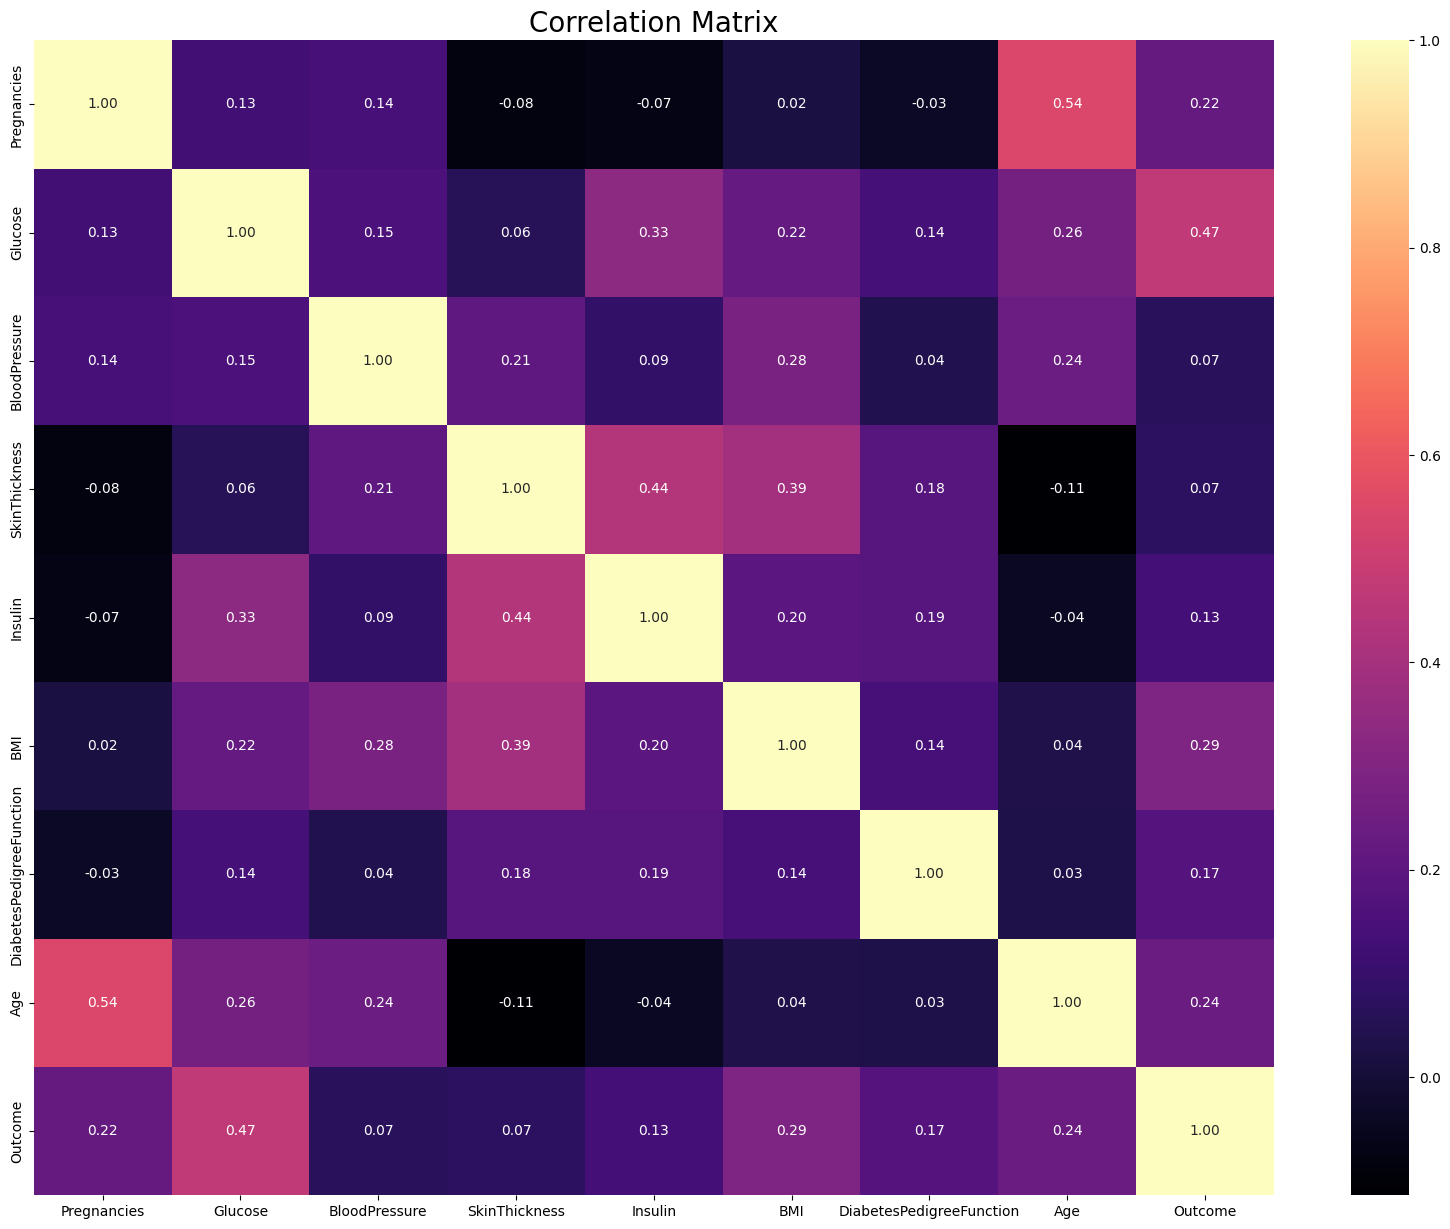

In [ ]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
#Data Preprocessing

In [ ]:
#Missing Values

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Zero values for some features are considered missing values
# Replace the zeros in specific columns of DataFrame ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI') with NaN (Not-a-Number) values
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

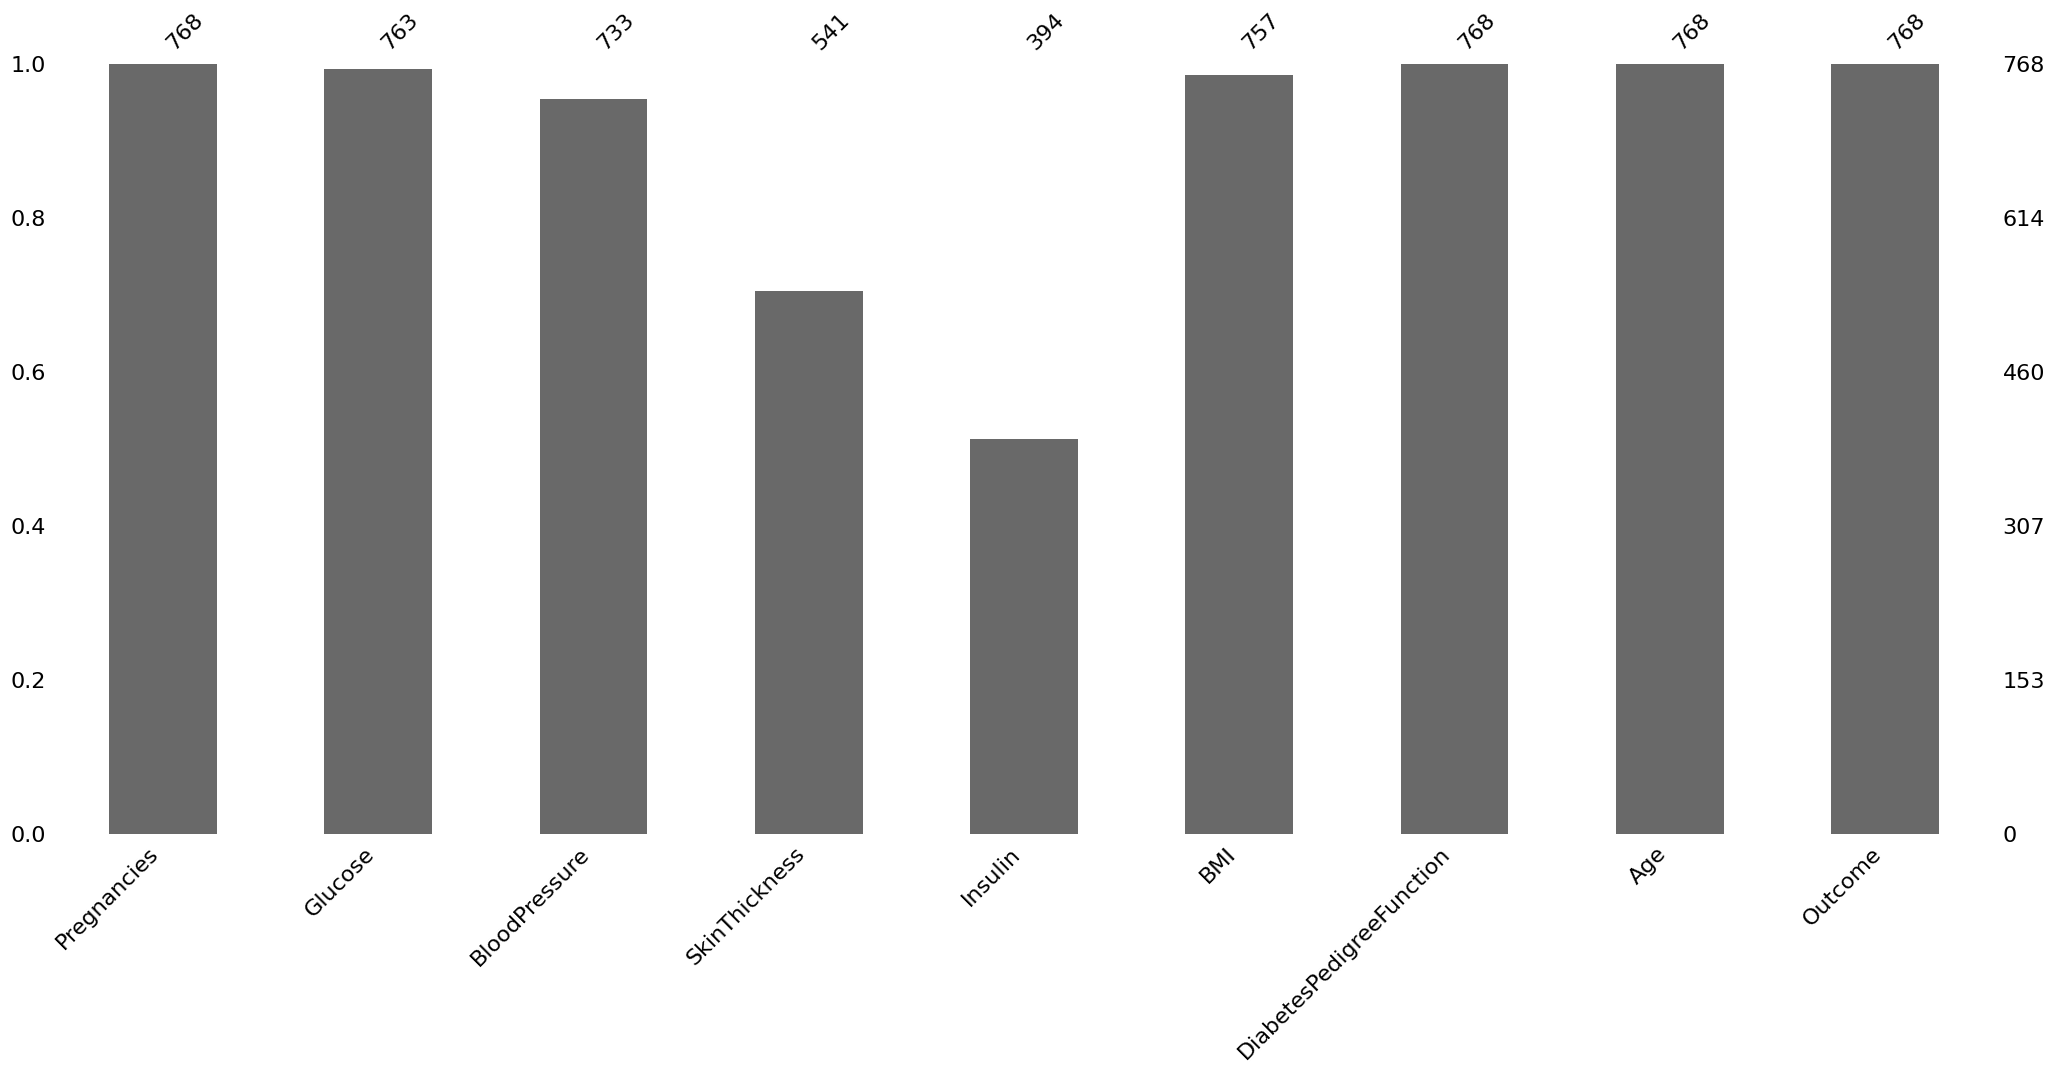

In [ ]:
import missingno as msno
msno.bar(df);

In [ ]:
# Median values for each feature based on the outcome
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
# Missing values are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# OUTLIERS HANDLING

In [ ]:
# Features with outliers compared to the 25% and 75% quarters.
for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


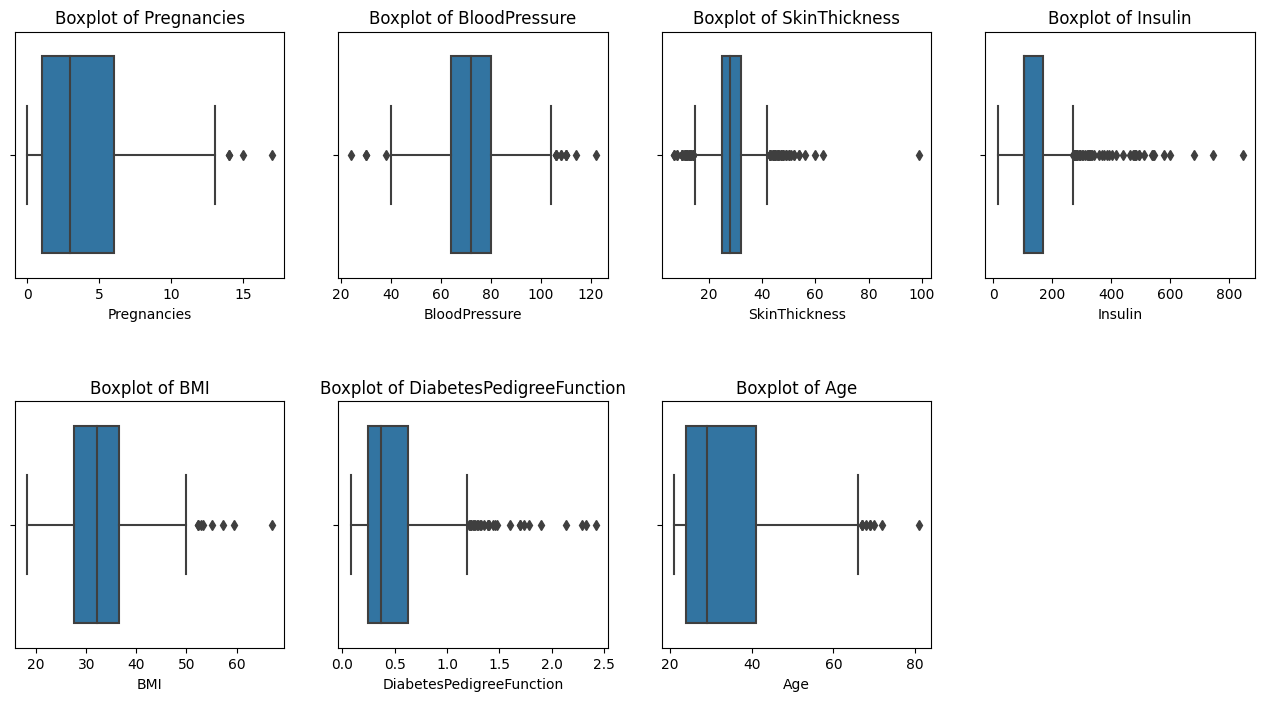

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of features with outliers
features_with_outliers = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create subplots with a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Plot boxplots for each feature with outliers
for i, feature in enumerate(features_with_outliers):
    sns.boxplot(x=df[feature], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Boxplot of {feature}')

# Remove any empty subplots
if len(features_with_outliers) < 8:
    for i in range(len(features_with_outliers), 8):
        fig.delaxes(axes[i // 4, i % 4])

plt.show()


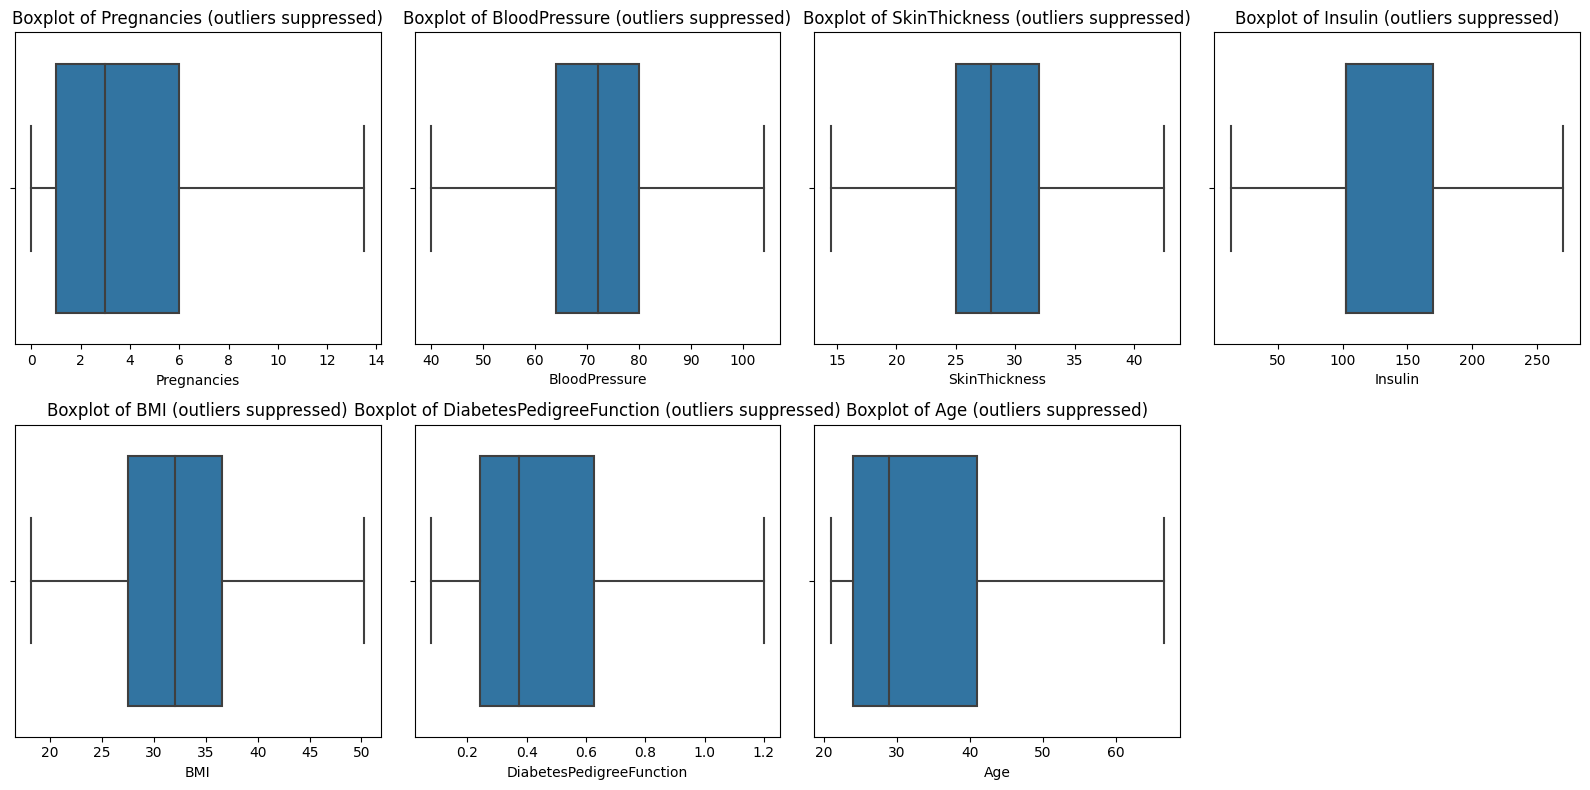

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x4 grid of boxplots for features with outliers suppressed
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Define the clipping boundaries (1.5 times IQR below Q1 and above Q3) and plot boxplots
for i, feature in enumerate(features_with_outliers):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clip the feature to the lower and upper bounds
    df[feature] = df[feature].clip(lower, upper)

    # Plot the boxplot with outliers suppressed
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} (outliers suppressed)')

# Hide any remaining empty subplots
for j in range(len(features_with_outliers), 8):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


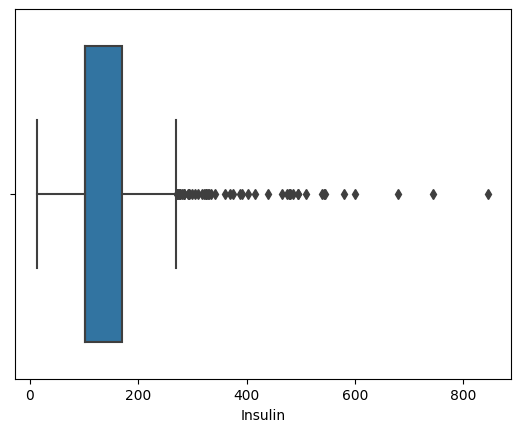

In [ ]:
# Visualizing the Insulin variable with boxplot
#import seaborn as sns
#sns.boxplot(x = df["Insulin"]);

In [ ]:
# Suppress outliers
#Q1 = df.Insulin.quantile(0.25)
#Q3 = df.Insulin.quantile(0.75)
#IQR = Q3-Q1
#lower = Q1 - 1.5*IQR
#upper = Q3 + 1.5*IQR
#df.loc[df["Insulin"] > upper,"Insulin"] = upper

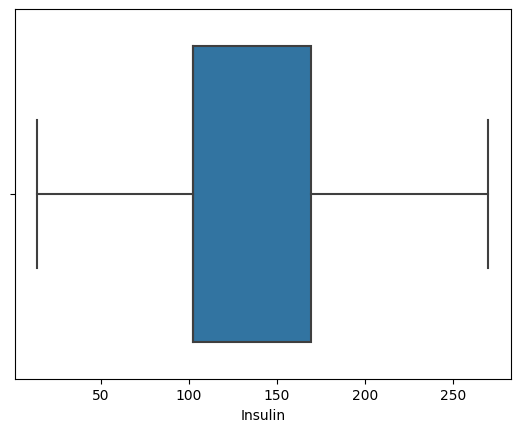

In [ ]:
#import seaborn as sns
#sns.boxplot(x = df["Insulin"]);

In [ ]:
df.shape

(768, 9)

In [ ]:
# Outliers detection with the LOF method
#from sklearn.neighbors import LocalOutlierFactor
#lof =LocalOutlierFactor(n_neighbors= 10)
#outlier_array = lof.fit_predict(df)
#outlier_array

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [ ]:
#import numpy as np

# Assuming `outlier_array` contains the array with outlier labels
#outlier_count = np.count_nonzero(outlier_array == -1)

#print("Number of outliers:", outlier_count)


Number of outliers: 26


In [ ]:
# Threshold value according to lof scores
#threshold = np.sort(df_scores)[7]
#threshold

-1.740031580305444

In [ ]:
# Delete those that are higher than the threshold
#outlier = df_scores > threshold
#df = df[outlier]

In [ ]:
# The new size of the dataset
df.shape

(768, 9)

In [ ]:
# Create categorical variables according to BMI ranges
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,Obesity 1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,Overweight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3


In [ ]:
# Create categorical variable according to the insulin value. Normal levels of insulin [16, 166]
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
# Add categorical variables to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,Obesity 1,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,Overweight,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,Normal,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3,Abnormal


In [ ]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,Obesity 1,Abnormal,High
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,Normal,Abnormal,High
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3,Abnormal,High


In [ ]:
# One Hot Encoding transformation (categorical variables converted into numerical values)
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,1,0,0,0,0,0,0,0,0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,0,0,0,1,0,1,0,1,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,0,0,0,0,0,0,0,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,0,0,0,1,0,1,0,1,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,0,0,1,0,0,0,0,0,0


In [ ]:
print(df.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight'],
      dtype='object')


In [ ]:
categorical_df = df[['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight']]


In [ ]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome", 'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight'], axis=1)
cols = X.columns
index = X.index

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [ ]:
# Standardization
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,2.163399,0.235294


In [ ]:
X = pd.concat([X,categorical_df], axis = 1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,1,0,0,0,0,0,0,0,0
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,0,0,0,1,0,1,0,1,0
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,0,0,0,0,0,0,0,0,0
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,0,0,0,1,0,1,0,1,0
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,2.163399,0.235294,0,0,1,0,0,0,0,0,0


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
#Base Models

In [ ]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 123)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 123)))
models.append(('RF', RandomForestClassifier(random_state = 123)))
models.append(('SVM', SVC(gamma='auto', random_state = 123)))
models.append(('XGB', GradientBoostingClassifier(random_state = 123)))
models.append(("LightGBM", LGBMClassifier(random_state = 123)))

# evaluate each model in turn
results = []
names = []

In [ ]:
for name, model in models:

        kfold = KFold(n_splits = 10, random_state = 123, shuffle=True)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


LR: 0.847573 (0.031772)
KNN: 0.848941 (0.029811)
CART: 0.841217 (0.038675)
RF: 0.880246 (0.039730)
SVM: 0.855366 (0.041303)
XGB: 0.876384 (0.023083)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 241, number of negative: 450
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 691, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348770 -> initscore=-0.624451
[LightGBM] [Info] Start training from score -0.624451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

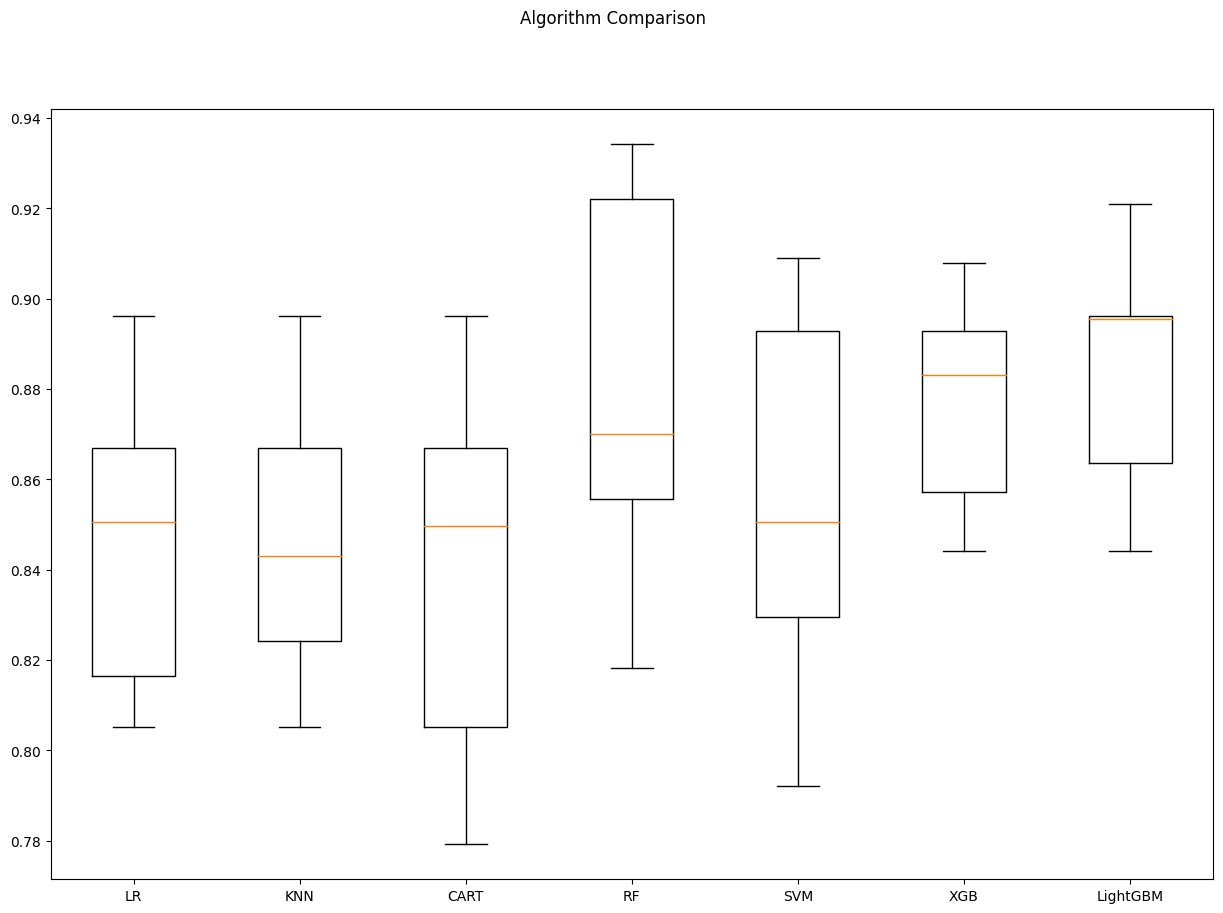

In [ ]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#############################################################################################################################3

In [ ]:
# Hyperparameter Tuning and Fitting for Random Forest

In [ ]:
rf_params = {"n_estimators" :[100,200,500,1000],
             "max_features": [3,5,7],
            "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8, None]}

In [ ]:
rf_model = RandomForestClassifier(random_state = 123)

In [ ]:
rf_grid_search = GridSearchCV(rf_model,
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [ ]:
best_rf_params= rf_grid_search.best_params_
print("Best RF Hyperparameters:", best_rf_params)

Best RF Hyperparameters: {'max_depth': 8, 'max_features': 7, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
rf_tuned = RandomForestClassifier(**rf_grid_search.best_params_)

In [ ]:
rf_tuned = rf_tuned.fit(X,y)

In [ ]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.8867566643882434

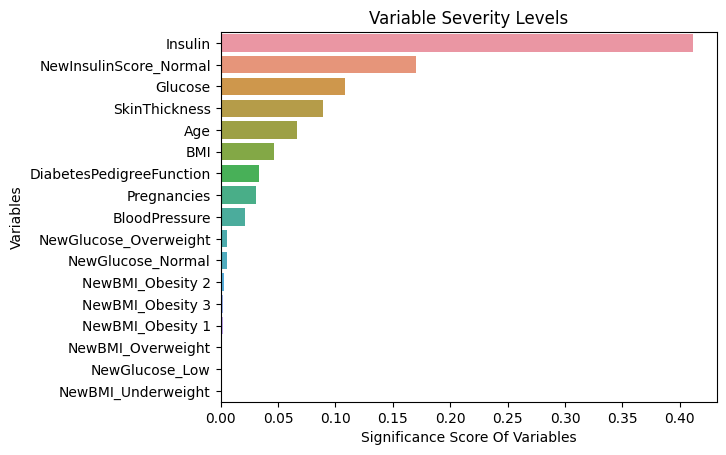

In [ ]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

In [ ]:
##############################################################

In [ ]:
# Hyperparameter Tuning and Fitting for Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for SVM
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": ["scale", "auto"]
}

# Create the SVM model
svm_model = SVC(random_state=123)

# Perform GridSearchCV to find the best hyperparameters
svm_grid_search = GridSearchCV(svm_model, svm_params, cv=10, n_jobs=-1, verbose=2)
svm_grid_search.fit(X, y)

# Display the best hyperparameters
best_svm_params = svm_grid_search.best_params_
print("Best SVM Hyperparameters:", best_svm_params)

# Create an SVM model with the best hyperparameters
svm_tuned = SVC(**best_svm_params)

# Fit the tuned SVM model
svm_tuned.fit(X, y)


Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best SVM Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


SVC(C=1, kernel='poly')

In [ ]:
##################################################################

In [ ]:
# Hyperparameter Tuning and Fitting for Gradient Boosting (XGB)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Gradient Boosting
xgb_params = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 8],
    "subsample": [0.8, 0.9, 1.0]
}

# Create the Gradient Boosting model
xgb_model = GradientBoostingClassifier(random_state=123)

# Perform GridSearchCV to find the best hyperparameters
xgb_grid_search = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X, y)

# Display the best hyperparameters
best_xgb_params = xgb_grid_search.best_params_
print("Best Gradient Boosting Hyperparameters:", best_xgb_params)

# Create a Gradient Boosting model with the best hyperparameters
xgb_tuned = GradientBoostingClassifier(**best_xgb_params)

# Fit the tuned Gradient Boosting model
xgb_tuned.fit(X, y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best Gradient Boosting Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}


GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200,
                           subsample=0.9)

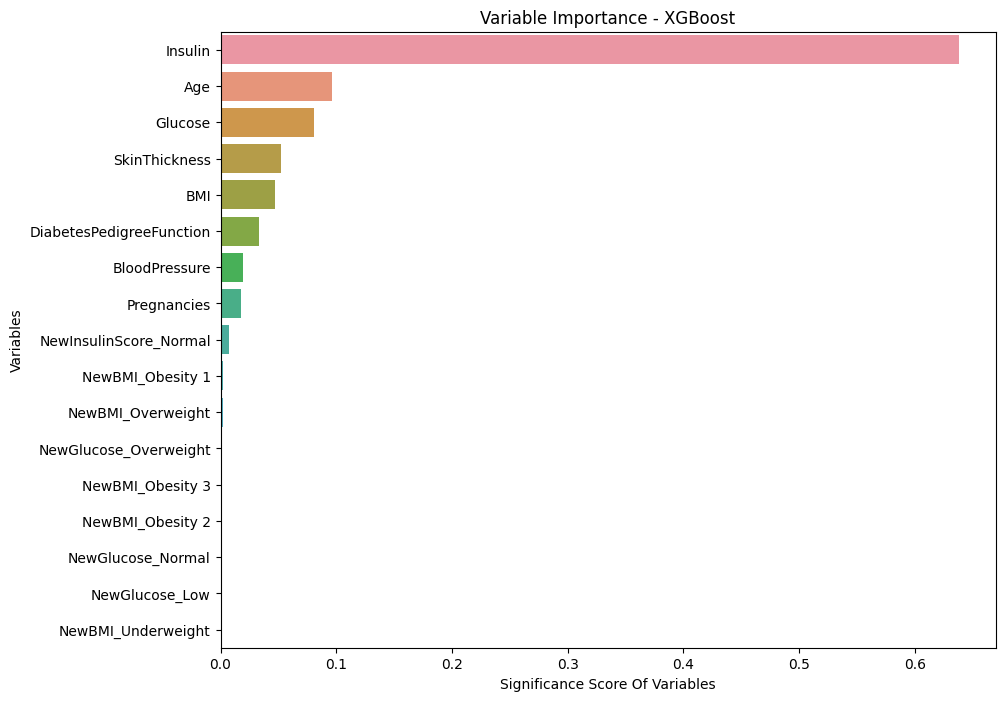

In [ ]:
# For XGBoost
feature_imp_xgb = pd.Series(xgb_tuned.feature_importances_,
                             index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp_xgb, y=feature_imp_xgb.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance - XGBoost")
plt.show()


In [ ]:
####################################################################################

In [ ]:
# Hyperparameter Tuning and Fitting for LightGBM (LGBM)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for LightGBM
lgbm_params = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 8],
    "subsample": [0.8, 0.9, 1.0]
}

# Create the LightGBM model
lgbm_model = LGBMClassifier(random_state=123)

# Perform GridSearchCV to find the best hyperparameters
lgbm_grid_search = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2)
lgbm_grid_search.fit(X, y)

# Display the best hyperparameters
best_lgbm_params = lgbm_grid_search.best_params_
print("Best LightGBM Hyperparameters:", best_lgbm_params)

# Create a LightGBM model with the best hyperparameters
lgbm_tuned = LGBMClassifier(**best_lgbm_params)

# Fit the tuned LightGBM model
lgbm_tuned.fit(X, y)


Fitting 10 folds for each of 81 candidates, totalling 810 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8)

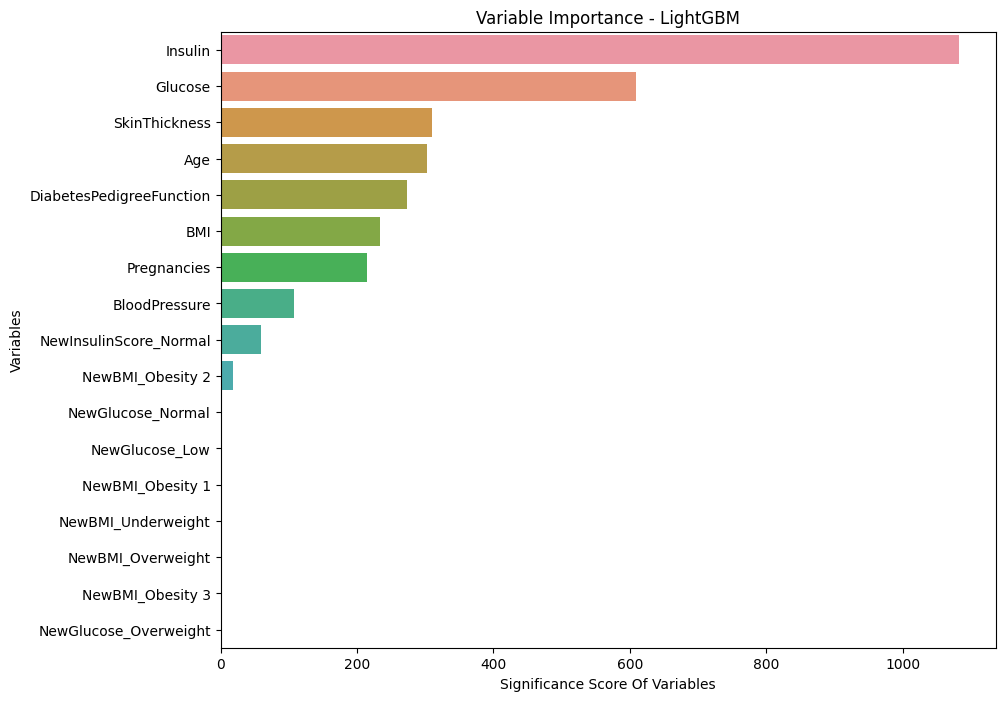

In [ ]:
# For LightGBM
feature_imp_lgbm = pd.Series(lgbm_tuned.feature_importances_,
                             index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp_lgbm, y=feature_imp_lgbm.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance - LightGBM")
plt.show()


In [ ]:
##################################################################################

Tuned RF: 0.893284 (0.029911)
Tuned SVM: 0.862013 (0.034359)
Tuned XGB: 0.897180 (0.025500)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 241, number of negative: 450
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 691, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348770 -> initscore=-0.624451
[LightGBM] [Info] Start training from score -0.624451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

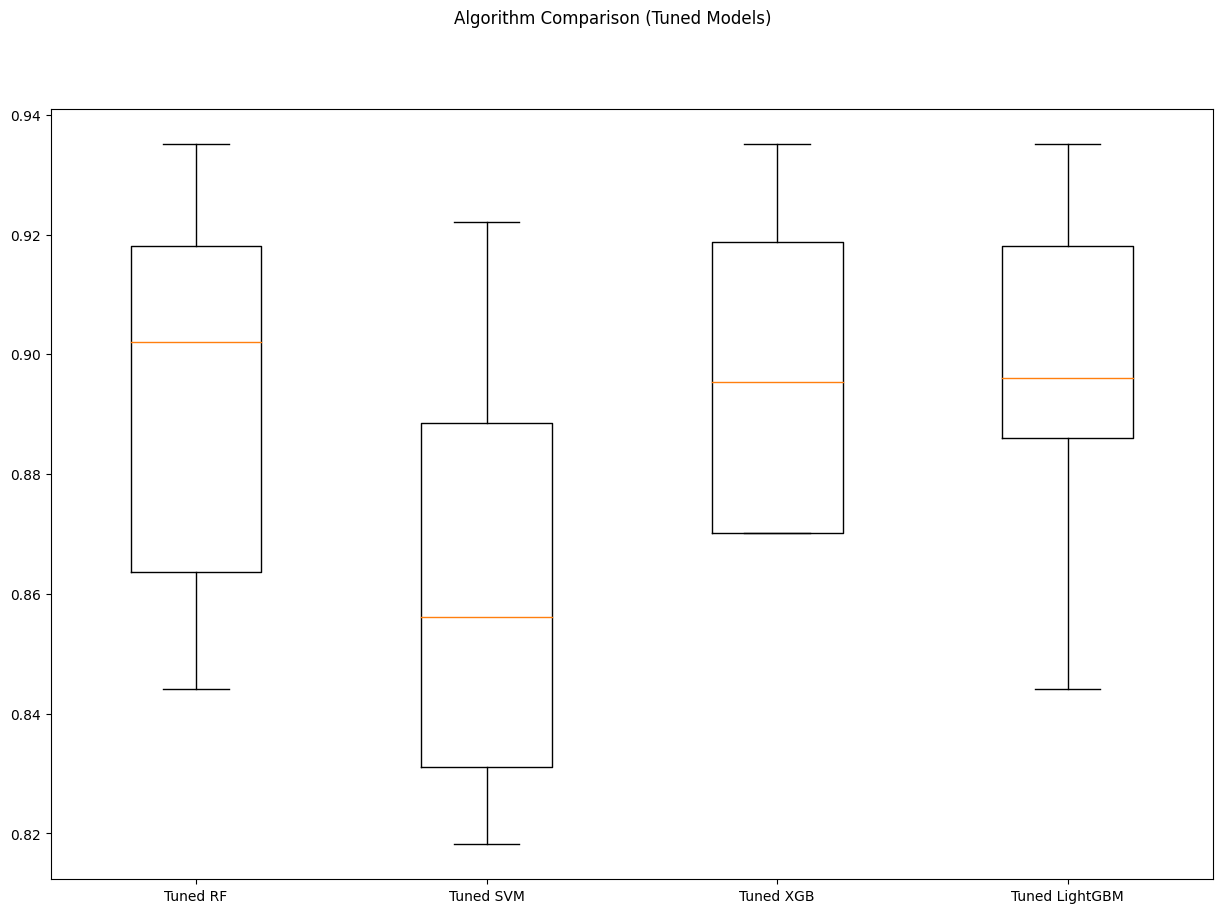

In [ ]:
# Create tuned models with best hyperparameters

# List of tuned models
tuned_models = [
    ('Tuned RF', RandomForestClassifier(**best_rf_params, random_state=123)),
    ('Tuned SVM', SVC(**best_svm_params, random_state=123)),
    ('Tuned XGB', GradientBoostingClassifier(**best_xgb_params, random_state=123)),
    ('Tuned LightGBM', LGBMClassifier(**best_lgbm_params, random_state=123))
]

# evaluate each tuned model in turn
tuned_results = []
tuned_names = []

for name, model in tuned_models:

    kfold = KFold(n_splits=10, random_state=123, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    tuned_results.append(cv_results)
    tuned_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison for tuned models
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison (Tuned Models)')
ax = fig.add_subplot(111)
plt.boxplot(tuned_results)
ax.set_xticklabels(tuned_names)
plt.show()
